In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\DSCT\Dataset\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

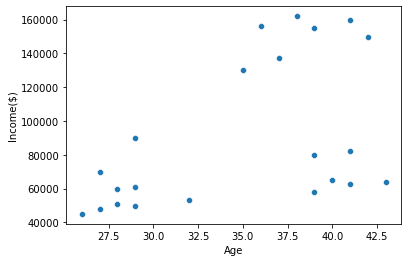

In [3]:
sns.scatterplot(x=df['Age'],y=df['Income($)'])

In [4]:
from sklearn.cluster import KMeans

ML_Model=KMeans(n_clusters=3)
X=df[['Age','Income($)']]
cluster_predict_old=ML_Model.fit_predict(X)
cluster_predict_old

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [5]:
df['old_cluster']=cluster_predict_old
df

,Name,Age,Income($),old_cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [6]:
df0=df[df['old_cluster']==0]
df1=df[df['old_cluster']==1]
df2=df[df['old_cluster']==2]

<AxesSubplot:xlabel='Age', ylabel='Income($)'>

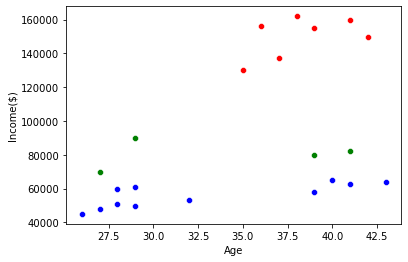

In [7]:
sns.scatterplot(x=df0['Age'],y=df['Income($)'],color="red")
sns.scatterplot(x=df1['Age'],y=df['Income($)'],color="blue")
sns.scatterplot(x=df2['Age'],y=df['Income($)'],color="green")

# Scaling (MinMaxScaler from Sklern)

In [8]:
# if all positive value is in col it transform into 0 to 1
# if any -VE values in col it transform into -1 to 1

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Model creation
Scaler_age=MinMaxScaler()
Scaler_income=MinMaxScaler()

# Model Train
Scaler_age.fit(df[['Age']])
Scaler_income.fit(df[['Income($)']])

# Transform the values
df['Scaled_age']=Scaler_age.transform(df[['Age']])
df['Sacled_income']=Scaler_income.transform(df[['Income($)']])

print("------------------------Transformed Data----------------------------------")
df.head()

------------------------Transformed Data----------------------------------


,Name,Age,Income($),old_cluster,Scaled_age,Sacled_income
0,Rob,27,70000,2,0.058824,0.213675
1,Michael,29,90000,2,0.176471,0.384615
2,Mohan,29,61000,1,0.176471,0.136752
3,Ismail,28,60000,1,0.117647,0.128205
4,Kory,42,150000,0,0.941176,0.897436


<AxesSubplot:xlabel='Scaled_age', ylabel='Sacled_income'>

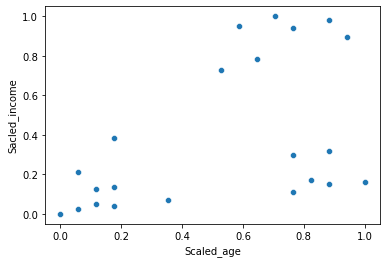

In [10]:
sns.scatterplot(x=df['Scaled_age'],y=df['Sacled_income'])

In [11]:
X1=df[['Scaled_age','Sacled_income']]
cluster_predict_new=ML_Model.fit_predict(X1)
cluster_predict_new

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [12]:
df["New_cluster"]=cluster_predict_new
df.head()

,Name,Age,Income($),old_cluster,Scaled_age,Sacled_income,New_cluster
0,Rob,27,70000,2,0.058824,0.213675,1
1,Michael,29,90000,2,0.176471,0.384615,1
2,Mohan,29,61000,1,0.176471,0.136752,1
3,Ismail,28,60000,1,0.117647,0.128205,1
4,Kory,42,150000,0,0.941176,0.897436,0


In [13]:
df0=df[df['New_cluster']==0]
df1=df[df['New_cluster']==1]
df2=df[df['New_cluster']==2]

<AxesSubplot:xlabel='Age', ylabel='Income($)'>

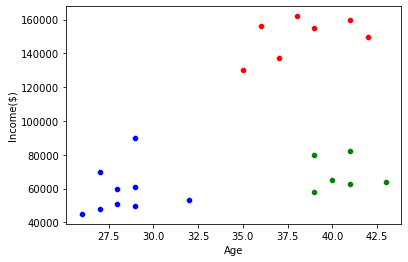

In [14]:
sns.scatterplot(x=df0['Age'],y=df['Income($)'],color="red")
sns.scatterplot(x=df1['Age'],y=df['Income($)'],color="blue")
sns.scatterplot(x=df2['Age'],y=df['Income($)'],color="green")

<AxesSubplot:xlabel='Scaled_age', ylabel='Sacled_income'>

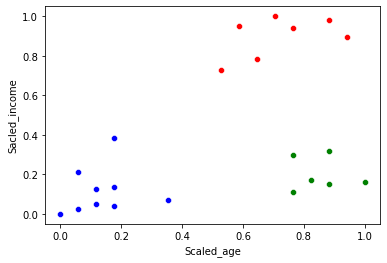

In [15]:
sns.scatterplot(x=df0['Scaled_age'],y=df['Sacled_income'],color="red")
sns.scatterplot(x=df1['Scaled_age'],y=df['Sacled_income'],color="blue")
sns.scatterplot(x=df2['Scaled_age'],y=df['Sacled_income'],color="green")

In [16]:
ML_Model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

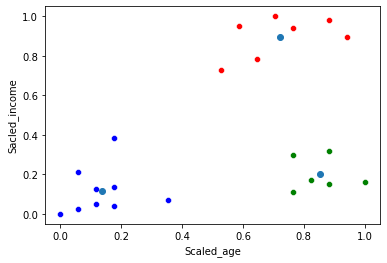

In [17]:
sns.scatterplot(x=df0['Scaled_age'],y=df['Sacled_income'],color="red")
sns.scatterplot(x=df1['Scaled_age'],y=df['Sacled_income'],color="blue")
sns.scatterplot(x=df2['Scaled_age'],y=df['Sacled_income'],color="green")
plt.scatter(ML_Model.cluster_centers_[:,0],ML_Model.cluster_centers_[:,1])

# how to find perfect value for k

In [18]:
#create A model k=1,2,3...15

SSE=[]
X=df[['Scaled_age','Sacled_income']]

for k in range(1,16):
    # create Model
    ML_Model=KMeans(n_clusters=k)
    # model train
    ML_Model.fit(X)
    # find SSE
    sse=ML_Model.inertia_
    SSE.append(sse)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
SSE

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21055478995472496,
 0.17299621932455464,
 0.13265419827245162,
 0.10663983840905436,
 0.08701976211883644,
 0.06554005805181391,
 0.0484687368005175,
 0.038101510924463636,
 0.031034992989344867,
 0.02336003499387405]

Text(0, 0.5, 'SSE')

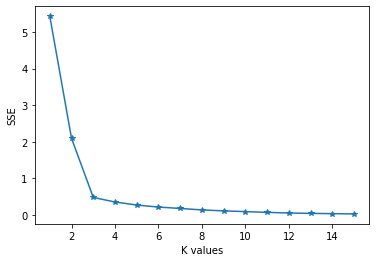

In [20]:
plt.plot(list(range(1,16)),SSE,'-*')
plt.xlabel("K values")
plt.ylabel("SSE")

# Prediction

In [21]:
age=40
income=75000
scaled_age=Scaler_age.transform([[age]])
scaled_income=Scaler_income.transform([[income]])

C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [24]:
scaled_age[0][0]

0.8235294117647061

In [25]:
scaled_income[0][0]

0.25641025641025644

In [26]:
from sklearn.cluster import k_means
X=df[['Scaled_age','Sacled_income']]
ML_Model=KMeans(n_clusters=3)
ML_Model.fit_predict(X)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [27]:
ML_Model.predict([[scaled_age[0][0],scaled_income[0][0]]])

C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])